<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-10 - Wait-Attention (Flat-Trend) - Gold - LSTM </h1> </html>

## Gold  - Period: 01/01/2024 - 30/06/2024
5-minutes time-frame
     
### Predictions of Flat-Trend
- Early-Stopping
- Loss function: BinaryCrossentropy
- Metrics: F1, Precision, Recall, Accuracy

### length of analysed history (sliding window)- 50 raws ago

#### dataset: 35232 rows (5-minutes)
#### use part of the dataset: 12000 rows, which is around 2 months
#### train / test = 90 /10

In [1]:
# epoch = 20
# patience = 5
# take-profit = $10
# hours = 4


________________________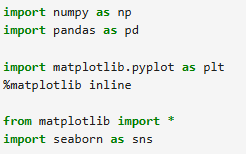

In [495]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns

____________________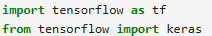

In [499]:
import tensorflow as tf
from tensorflow import keras

__________________

In [503]:
print(tf.__version__)

2.18.0


In [505]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

_______________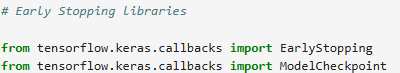

In [508]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

_____________

In [512]:
np.random.seed(19)

____________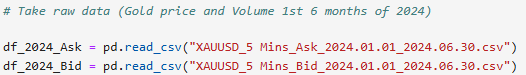

In [516]:
df_2024_Ask = pd.read_csv("XAUUSD_5 Mins_Ask_2024.01.01_2024.06.30.csv")
df_2024_Bid = pd.read_csv("XAUUSD_5 Mins_Bid_2024.01.01_2024.06.30.csv")

______________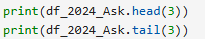

In [520]:
print(df_2024_Ask.head(3))
print(df_2024_Ask.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume 
0  2024.01.01 23:00:00  2064.562  2067.475  2064.075  2065.686  0.11843
1  2024.01.01 23:05:00  2065.616  2065.839  2064.476  2064.902  0.06906
2  2024.01.01 23:10:00  2064.902  2066.825  2064.752  2066.105  0.04203
                Time (UTC)      Open      High       Low     Close  Volume 
35229  2024.06.30 23:45:00  2326.026  2326.315  2325.875  2325.945  0.02538
35230  2024.06.30 23:50:00  2325.945  2325.945  2325.555  2325.795  0.02880
35231  2024.06.30 23:55:00  2325.825  2325.835  2325.066  2325.245  0.07257


____________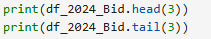

In [524]:
print(df_2024_Bid.head(3))
print(df_2024_Bid.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume 
0  2024.01.01 23:00:00  2062.598  2066.595  2062.405  2065.214  0.12012
1  2024.01.01 23:05:00  2065.185  2065.194  2063.851  2064.455  0.06508
2  2024.01.01 23:10:00  2064.424  2066.365  2064.395  2065.734  0.03945
                Time (UTC)      Open      High       Low     Close  Volume 
35229  2024.06.30 23:45:00  2325.645  2325.905  2325.465  2325.525  0.06891
35230  2024.06.30 23:50:00  2325.515  2325.525  2325.125  2325.385  0.09813
35231  2024.06.30 23:55:00  2325.438  2325.438  2324.625  2324.825  0.07851


<html> <h3 style="font-style:italic; color:blue;"> Merge DataFrame </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [530]:
#(!! DO ONLY ONCE)

data = df_2024_Bid.merge(df_2024_Ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')

data

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2024.01.01 23:00:00,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843
1,2024.01.01 23:05:00,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906
2,2024.01.01 23:10:00,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203
3,2024.01.01 23:15:00,2065.715,2066.075,2065.055,2065.585,0.04386,2066.105,2066.525,2065.415,2065.986,0.03201
4,2024.01.01 23:20:00,2065.585,2065.815,2065.295,2065.555,0.03171,2065.992,2066.242,2065.645,2065.855,0.03309
...,...,...,...,...,...,...,...,...,...,...,...
35227,2024.06.30 23:35:00,2325.005,2326.035,2324.905,2325.625,0.07389,2325.425,2326.455,2325.345,2326.065,0.07116
35228,2024.06.30 23:40:00,2325.625,2325.755,2325.165,2325.575,0.06771,2326.045,2326.202,2325.595,2325.965,0.04635
35229,2024.06.30 23:45:00,2325.645,2325.905,2325.465,2325.525,0.06891,2326.026,2326.315,2325.875,2325.945,0.02538
35230,2024.06.30 23:50:00,2325.515,2325.525,2325.125,2325.385,0.09813,2325.945,2325.945,2325.555,2325.795,0.02880


____________________

In [533]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35232 non-null  object 
 1   Open_x      35232 non-null  float64
 2   High_x      35232 non-null  float64
 3   Low_x       35232 non-null  float64
 4   Close_x     35232 non-null  float64
 5   Volume _x   35232 non-null  float64
 6   Open_y      35232 non-null  float64
 7   High_y      35232 non-null  float64
 8   Low_y       35232 non-null  float64
 9   Close_y     35232 non-null  float64
 10  Volume _y   35232 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


In [536]:
# No NaN elements !

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [539]:
# rename columns

data.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

__________________

In [542]:
data.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2024.01.01 23:00:00,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843
1,2024.01.01 23:05:00,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906
2,2024.01.01 23:10:00,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203


#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [546]:
# Delta of trading volumes (as well as the modulus of this delta) between Ask 
# and Bid volumes are added as additional parameters

data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
data["Volume_Delta_abs"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()

In [548]:
data["Open_Delta"] = data["Open_Ask"]  - data["Open_Bid"]
data["High_Delta"] = data["High_Ask"]  - data["High_Bid"]
data["Low_Delta"]  = data["Low_Ask"]   - data["Low_Bid"]
data["Close_Delta"]= data["Close_Ask"] - data["Close_Bid"]

_________________

In [551]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000,35232.000000
mean,2205.889710,2206.645921,2205.128739,2205.897065,0.152156,2206.249356,2207.005264,2205.487844,2206.256846,0.152062,-0.000094,0.085480,0.359646,0.359343,0.359105,0.359781
std,142.978742,143.165839,142.780793,142.978152,0.159003,143.005802,143.192352,142.808660,143.005909,0.156439,0.130376,0.098443,0.105919,0.085914,0.090534,0.086697
min,1985.635000,1986.595000,1984.088000,1985.625000,0.000000,1985.915000,1986.945000,1984.475000,1985.915000,0.000000,-1.064400,0.000000,0.001000,0.042000,0.001000,0.075000
25%,2035.855000,2036.333250,2035.385000,2035.855000,0.046255,2036.195000,2036.675000,2035.722000,2036.195000,0.049140,-0.051012,0.017700,0.317000,0.320000,0.320000,0.320000
50%,2255.281500,2256.425000,2254.270000,2255.301500,0.098350,2255.650000,2256.758500,2254.608500,2255.660000,0.101700,0.001105,0.052920,0.350000,0.350000,0.350000,0.350000
75%,2333.475000,2334.292250,2332.639750,2333.477500,0.199250,2333.878250,2334.685250,2333.005000,2333.886750,0.196412,0.054670,0.118320,0.387000,0.387000,0.387000,0.387000
max,2449.735000,2449.985000,2447.555000,2449.758000,1.485490,2450.185000,2450.325000,2447.966000,2450.165000,2.842680,2.703590,2.703590,5.981000,5.981000,5.981000,5.981000


______________

In [555]:
data.shape

(35232, 17)

_______________

In [559]:
data.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,2024.01.01 23:00:00,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843,-0.00169,0.00169,1.964,0.880,1.670,0.472
1,2024.01.01 23:05:00,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906,0.00398,0.00398,0.431,0.645,0.625,0.447
2,2024.01.01 23:10:00,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203,0.00258,0.00258,0.478,0.460,0.357,0.371


<html> <h3 style="font-style:italic; color:blue;"> Date transformation </h3> </html>

_____________________

In [565]:
import datetime

______________________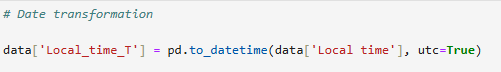

In [569]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

_____________

In [573]:
data=data.drop(['Local time'],axis=1)

________________

In [577]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Open_Bid          35232 non-null  float64            
 1   High_Bid          35232 non-null  float64            
 2   Low_Bid           35232 non-null  float64            
 3   Close_Bid         35232 non-null  float64            
 4   Volume_Bid        35232 non-null  float64            
 5   Open_Ask          35232 non-null  float64            
 6   High_Ask          35232 non-null  float64            
 7   Low_Ask           35232 non-null  float64            
 8   Close_Ask         35232 non-null  float64            
 9   Volume_Ask        35232 non-null  float64            
 10  Volume_Delta      35232 non-null  float64            
 11  Volume_Delta_abs  35232 non-null  float64            
 12  Open_Delta        35232 non-null  float64            
 13  H

<html> <h3 style="font-style:italic; color:blue;"> Data Visualisation </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next 3 cells.

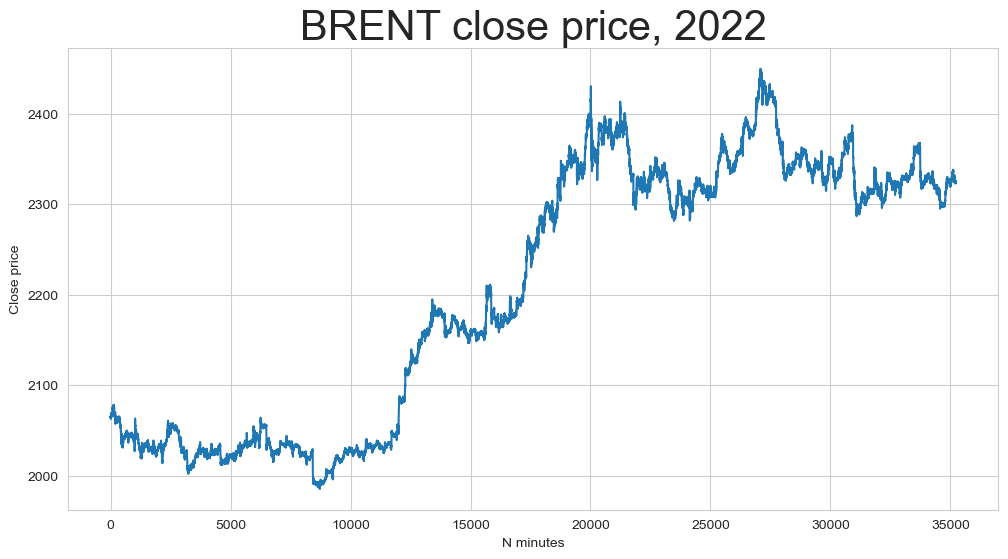

In [583]:
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('BRENT close price, 2022')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

<Figure size 1200x500 with 0 Axes>

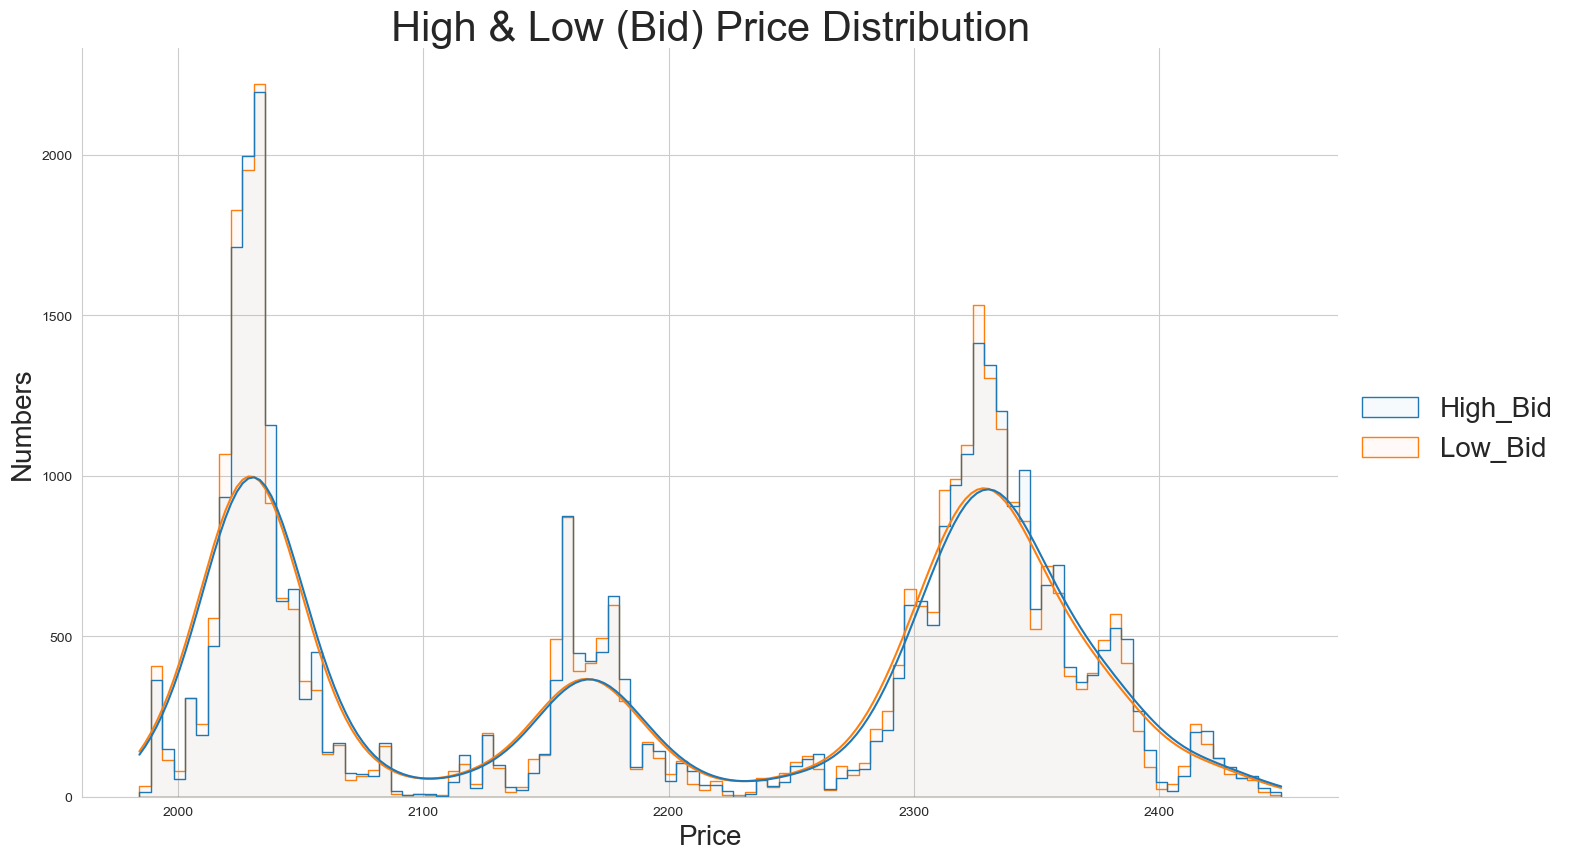

In [584]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species", 
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show();

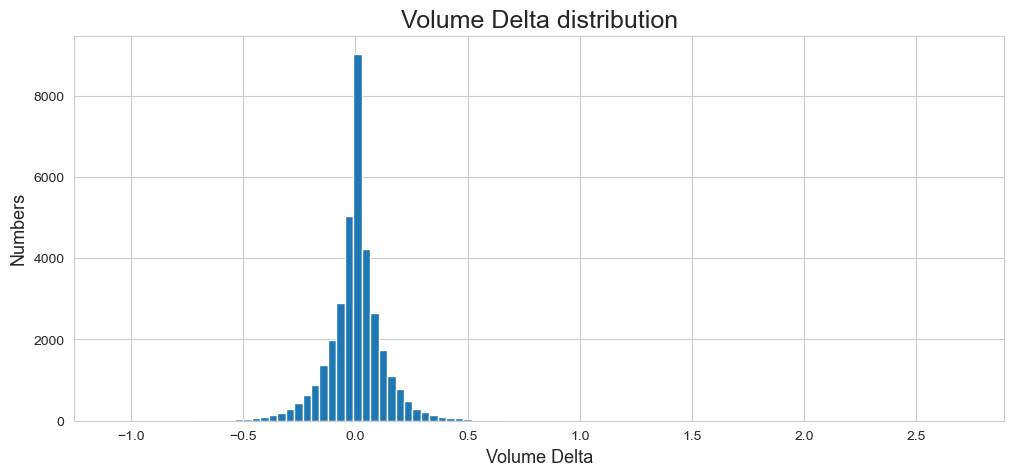

In [585]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Delta'],bins=100)
plt.title('Volume Delta distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Volume Delta',size=13);

In [586]:
# Distribution has mostly positive values
# So Volume_Ask is usually greater than Volume_Bid,
# This corresponds to the upward trend in Gold in the first 6 months of 2024

<html> <h3 style="font-style:italic; color:blue;"> Indicate starts of days and weeks </h3> </html>

_____________________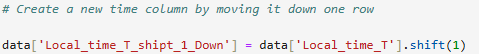

In [594]:
data['Local_time_T_shipt_1_Down'] = data['Local_time_T'].shift(1)

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [598]:
# calculate the time interval with the previous raw

data["Local_time_T_Delta"] = data["Local_time_T"] - data["Local_time_T_shipt_1_Down"]

_____________________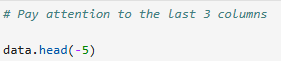

In [601]:
data.head(5)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta
0,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843,-0.00169,0.00169,1.964,0.880,1.670,0.472,2024-01-01 23:00:00+00:00,NaT,NaT
1,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906,0.00398,0.00398,0.431,0.645,0.625,0.447,2024-01-01 23:05:00+00:00,2024-01-01 23:00:00+00:00,0 days 00:05:00
2,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203,0.00258,0.00258,0.478,0.460,0.357,0.371,2024-01-01 23:10:00+00:00,2024-01-01 23:05:00+00:00,0 days 00:05:00
3,2065.715,2066.075,2065.055,2065.585,0.04386,2066.105,2066.525,2065.415,2065.986,0.03201,-0.01185,0.01185,0.390,0.450,0.360,0.401,2024-01-01 23:15:00+00:00,2024-01-01 23:10:00+00:00,0 days 00:05:00
4,2065.585,2065.815,2065.295,2065.555,0.03171,2065.992,2066.242,2065.645,2065.855,0.03309,0.00138,0.00138,0.407,0.427,0.350,0.300,2024-01-01 23:20:00+00:00,2024-01-01 23:15:00+00:00,0 days 00:05:00


______________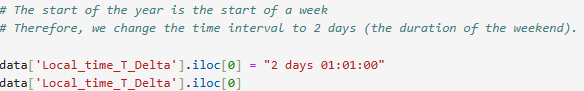

In [605]:
data['Local_time_T_Delta'].iloc[0] = "2 days 01:01:00"
data['Local_time_T_Delta'].iloc[0]

/var/folders/d2/hmjv5d3d1b3b7txbqt1_ct1r0000gn/T/ipykernel_83406/1040467289.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Timedelta('2 days 01:01:00')

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [609]:
# find intervals which are longer than 5 minutes

data[['Local_time_T_Delta']][data["Local_time_T_Delta"] > '0 days 00:05:00'].value_counts(sort=False)

Local_time_T_Delta
0 days 01:05:00       98
0 days 03:35:00        4
2 days 00:05:00        1
2 days 01:01:00        1
2 days 01:05:00       24
3 days 01:05:00        1
Name: count, dtype: int64

In [611]:
# We found the duration of night intervals when there is no trading in Gold.
# Total such intervals - 125, which is equal to the number of trading days during 6 first months of 2024

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [614]:
# create a new DataFrame with the beginning of the new days

new_day = data[['Local_time_T_Delta']][data["Local_time_T_Delta"] > '0 days 00:05:00']

_________________________

In [617]:
new_day['Local_time_T_Delta'].value_counts(sort=False)

Local_time_T_Delta
2 days 01:01:00     1
0 days 01:05:00    98
2 days 01:05:00    24
0 days 03:35:00     4
2 days 00:05:00     1
3 days 01:05:00     1
Name: count, dtype: int64

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [621]:
# find intervals which are longer than 1 day

data[['Local_time_T_Delta']][data['Local_time_T_Delta'] > '1 days 00:00:00'].value_counts(sort=False)

Local_time_T_Delta
2 days 00:05:00        1
2 days 01:01:00        1
2 days 01:05:00       24
3 days 01:05:00        1
Name: count, dtype: int64

In [623]:
# We found the weekend duration when there is no trading in Gold.
# Total such intervals - 27, which is equal to the number of weekends during 6 first months of 2024

In [625]:
# create a new DataFrame with the beginning of the new weeks

new_week = data[data["Local_time_T_Delta"] > '1 days 00:00:00']

_______________________

In [628]:
new_week["Local_time_T_Delta"].value_counts(sort=False)

Local_time_T_Delta
2 days 01:01:00     1
2 days 01:05:00    24
2 days 00:05:00     1
3 days 01:05:00     1
Name: count, dtype: int64

________________________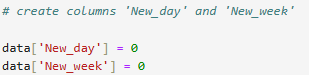

In [632]:
data['New_day'] = 0
data['New_week'] = 0

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [636]:
# Fill in "1" when the new day starts

data.loc[data["Local_time_T_Delta"] > '0 days 00:05:00', 'New_day'] = 1

_______________________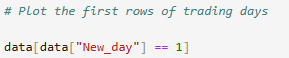

In [639]:
data[data["New_day"] == 1]

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,...,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta,New_day,New_week
0,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843,...,0.00169,1.964,0.880,1.670,0.472,2024-01-01 23:00:00+00:00,NaT,2 days 01:01:00,1,0
276,2058.018,2059.134,2058.018,2058.758,0.04366,2059.772,2059.882,2058.952,2059.292,0.03770,...,0.00596,1.754,0.748,0.934,0.534,2024-01-02 23:00:00+00:00,2024-01-02 21:55:00+00:00,0 days 01:05:00,1,0
552,2041.895,2042.425,2041.398,2042.044,0.09643,2042.452,2043.075,2042.015,2042.532,0.10547,...,0.00904,0.557,0.650,0.617,0.488,2024-01-03 23:00:00+00:00,2024-01-03 21:55:00+00:00,0 days 01:05:00,1,0
828,2043.218,2043.685,2042.774,2042.864,0.03565,2044.812,2045.092,2043.302,2043.302,0.02107,...,0.01458,1.594,1.407,0.528,0.438,2024-01-04 23:00:00+00:00,2024-01-04 21:55:00+00:00,0 days 01:05:00,1,0
1104,2044.385,2045.005,2042.825,2044.494,0.16514,2046.355,2046.445,2043.702,2044.966,0.13458,...,0.03056,1.970,1.440,0.877,0.472,2024-01-07 23:00:00+00:00,2024-01-05 21:55:00+00:00,2 days 01:05:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34104,2333.205,2334.395,2333.205,2333.748,0.07701,2335.000,2335.000,2333.975,2334.245,0.03176,...,0.04525,1.795,0.605,0.770,0.497,2024-06-24 22:00:00+00:00,2024-06-24 20:55:00+00:00,0 days 01:05:00,1,0
34380,2319.575,2319.935,2318.705,2319.925,0.04851,2320.165,2320.655,2319.365,2320.375,0.06285,...,0.01434,0.590,0.720,0.660,0.450,2024-06-25 22:00:00+00:00,2024-06-25 20:55:00+00:00,0 days 01:05:00,1,0
34656,2298.098,2299.055,2297.898,2298.694,0.07182,2299.492,2299.725,2298.736,2299.216,0.07026,...,0.00156,1.394,0.670,0.838,0.522,2024-06-26 22:00:00+00:00,2024-06-26 20:55:00+00:00,0 days 01:05:00,1,0
34932,2327.108,2327.915,2326.875,2326.905,0.02414,2328.992,2328.992,2327.295,2327.315,0.04502,...,0.02088,1.884,1.077,0.420,0.410,2024-06-27 22:00:00+00:00,2024-06-27 20:55:00+00:00,0 days 01:05:00,1,0


#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [643]:
# Fill in "1" when the new week starts

data.loc[data["Local_time_T_Delta"] > '1 days 00:00:00', 'New_week'] = 1

____________________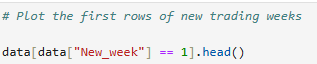

In [646]:
data[data["New_week"] == 1].head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,...,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta,New_day,New_week
0,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843,...,0.00169,1.964,0.880,1.670,0.472,2024-01-01 23:00:00+00:00,NaT,2 days 01:01:00,1,1
1104,2044.385,2045.005,2042.825,2044.494,0.16514,2046.355,2046.445,2043.702,2044.966,0.13458,...,0.03056,1.970,1.440,0.877,0.472,2024-01-07 23:00:00+00:00,2024-01-05 21:55:00+00:00,2 days 01:05:00,1,1
2484,2048.498,2048.598,2046.698,2047.705,0.22412,2050.302,2050.302,2047.302,2048.216,0.21842,...,0.00570,1.804,1.704,0.604,0.511,2024-01-14 23:00:00+00:00,2024-01-12 21:55:00+00:00,2 days 01:05:00,1,1
3834,2029.715,2029.715,2027.915,2028.505,0.12920,2030.305,2030.365,2028.502,2029.042,0.12594,...,0.00326,0.590,0.650,0.587,0.537,2024-01-21 23:00:00+00:00,2024-01-19 21:55:00+00:00,2 days 01:05:00,1,1
5214,2024.215,2027.014,2022.854,2023.515,0.25994,2025.245,2027.776,2023.545,2024.145,0.27963,...,0.01969,1.030,0.762,0.691,0.630,2024-01-28 23:00:00+00:00,2024-01-26 21:55:00+00:00,2 days 01:05:00,1,1


#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [650]:
# drop the columns that are no longer needed, 
# since the time series is regular 
# (each line is the next 5-minutes, except for the marked lines in the New_day and New_week columns

data2 = data.drop(['Local_time_T', 'Local_time_T_shipt_1_Down', 'Local_time_T_Delta'],axis=1)

____________________

In [653]:
data2.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week
0,2062.598,2066.595,2062.405,2065.214,0.12012,2064.562,2067.475,2064.075,2065.686,0.11843,-0.00169,0.00169,1.964,0.880,1.670,0.472,1,1
1,2065.185,2065.194,2063.851,2064.455,0.06508,2065.616,2065.839,2064.476,2064.902,0.06906,0.00398,0.00398,0.431,0.645,0.625,0.447,0,0
2,2064.424,2066.365,2064.395,2065.734,0.03945,2064.902,2066.825,2064.752,2066.105,0.04203,0.00258,0.00258,0.478,0.460,0.357,0.371,0,0


______________

In [657]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35232 non-null  float64
 1   High_Bid          35232 non-null  float64
 2   Low_Bid           35232 non-null  float64
 3   Close_Bid         35232 non-null  float64
 4   Volume_Bid        35232 non-null  float64
 5   Open_Ask          35232 non-null  float64
 6   High_Ask          35232 non-null  float64
 7   Low_Ask           35232 non-null  float64
 8   Close_Ask         35232 non-null  float64
 9   Volume_Ask        35232 non-null  float64
 10  Volume_Delta      35232 non-null  float64
 11  Volume_Delta_abs  35232 non-null  float64
 12  Open_Delta        35232 non-null  float64
 13  High_Delta        35232 non-null  float64
 14  Low_Delta         35232 non-null  float64
 15  Close_Delta       35232 non-null  float64
 16  New_day           35232 non-null  int64 

____________________

In [662]:
data = []

<html> <h3 style="font-style:italic; color:blue;"> Hourly and Daily Volatility Distribution </h3> </html>


_____________________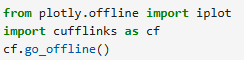

In [667]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [671]:
# Take 1-hour and 1-day data (Gold price and Volume 1st 6 months of 2024) 

Ask_1h_2024 = pd.read_csv("XAUUSD_Hourly_Ask_2024.01.01_2024.06.30.csv")
Ask_1d_2024 = pd.read_csv("XAUUSD_Daily_Ask_2024.01.01_2024.06.30.csv")

______________

In [673]:
Ask_1h_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  2938 non-null   object 
 1   Open        2938 non-null   float64
 2   High        2938 non-null   float64
 3   Low         2938 non-null   float64
 4   Close       2938 non-null   float64
 5   Volume      2938 non-null   float64
dtypes: float64(5), object(1)
memory usage: 137.8+ KB


__________________

In [678]:
Ask_1d_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  155 non-null    object 
 1   Open        155 non-null    float64
 2   High        155 non-null    float64
 3   Low         155 non-null    float64
 4   Close       155 non-null    float64
 5   Volume      155 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.4+ KB


#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [682]:
# Add a column with hourly volatility 

Ask_1h_2024['Volatility'] = Ask_1h_2024['High'] - Ask_1h_2024['Low']

In [684]:
# Add a column with dayly volatility 

Ask_1d_2024['Volatility'] = Ask_1d_2024['High'] - Ask_1d_2024['Low']

__________________________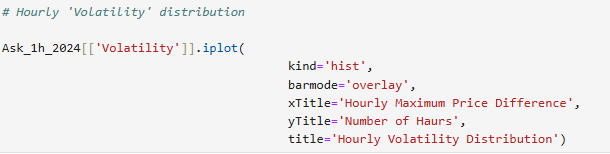

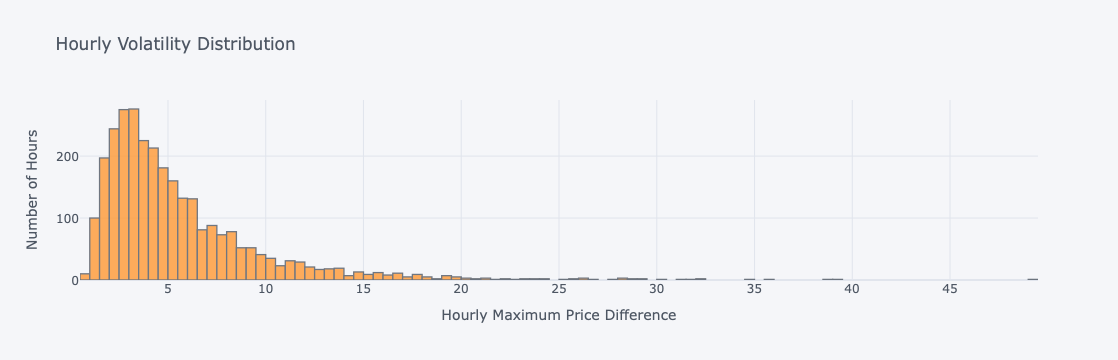

In [687]:
Ask_1h_2024[['Volatility']].iplot(
        kind='hist',
        barmode='overlay',
        xTitle='Hourly Maximum Price Difference',
        yTitle='Number of Hours',
        title='Hourly Volatility Distribution')

____________________

In [691]:
Ask_1h_2024['Volatility'].describe()

count    2938.000000
mean        5.584971
std         4.376151
min         0.700000
25%         2.850000
50%         4.360000
75%         6.865250
max        49.290000
Name: Volatility, dtype: float64

________________________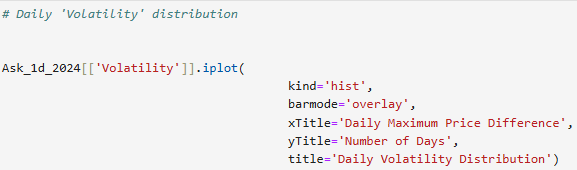

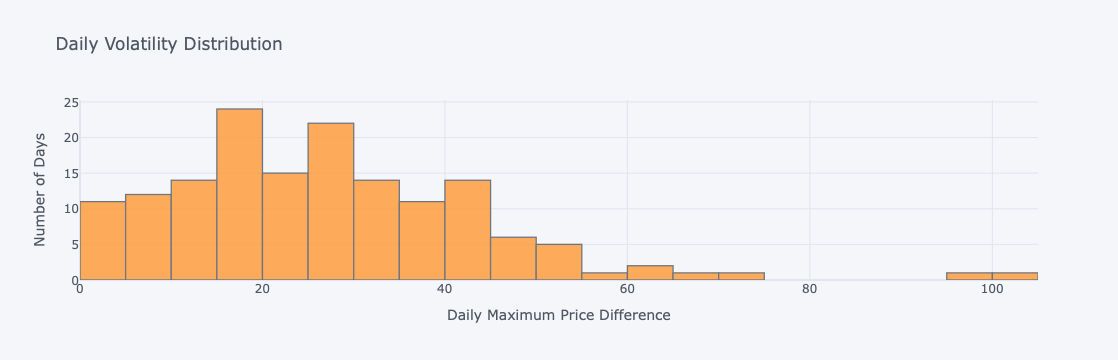

In [695]:
Ask_1d_2024[['Volatility']].iplot(
        kind='hist',
        barmode='overlay',
        xTitle='Daily Maximum Price Difference',
        yTitle='Number of Days',
        title='Daily Volatility Distribution')

_______________________

In [699]:
Ask_1d_2024['Volatility'].describe()

count    155.000000
mean      26.807277
std       16.971237
min        2.066000
25%       15.590000
50%       25.023000
75%       36.279500
max      100.960000
Name: Volatility, dtype: float64

In [702]:
# We will look for rows with potential take-profit = $10


- create 'High_Bid' and 'Low_Ask' 4 hours ahead
- that is, the maximum holding of a position is no more than 4 hours
- 4 hours is 48 of 5-minute intervals


_____________________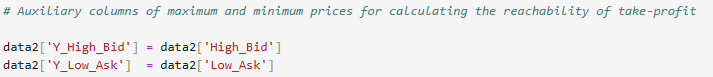

In [706]:
data2['Y_High_Bid'] = data2['High_Bid']
data2['Y_Low_Ask'] = data2['Low_Ask']

________________________

In [710]:
data2.tail(2)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
35230,2325.515,2325.525,2325.125,2325.385,0.09813,2325.945,2325.945,2325.555,2325.795,0.02880,-0.06933,0.06933,0.430,0.420,0.430,0.41,0,0,2325.525,2325.555
35231,2325.438,2325.438,2324.625,2324.825,0.07851,2325.825,2325.835,2325.066,2325.245,0.07257,-0.00594,0.00594,0.387,0.397,0.441,0.42,0,0,2325.438,2325.066


<html> <h3 style="font-style:italic; color:blue;"> Data Normalisation </h3> </html>

In [715]:
# We do price normalisation simply by dividing all prices by 1000 (for Gold)
# It is not essential that the normalised prices were in the range between [0,1]
# It is more important that the variables were approximately of the same order

In [717]:
# Only applicable to Volumes and Deltas:

# normalisation
# data=(data-data.min())/(data.max()-data.min())

##### Find Max and Min for Prices, Volumes and Deltas

In [720]:
# Max price is Max High_Ask 
# Min price is Min Low_Bid

# Max Volume = Max{Volume_Bid, Volume_Ask}
# Min Volume = 0

# Max_Delta = Max{Open_Delta, High_Delta, Low_Delta, Close_Delta}
# Min_Delta = Min{Open_Delta, High_Delta, Low_Delta, Close_Delta}

#### Now just press 'CTRL' and 'ENTER' keys on the next 19 cells with code.

In [723]:
max_price = (data2['High_Ask']).max()
max_price

2450.325

In [725]:
min_price = data2['Low_Bid'].min()
min_price

1984.088

In [727]:
max_volume = max(max(data2['Volume_Bid']), max(data2['Volume_Ask']))
max_volume

2.84268

In [729]:
max_Delta = max(max(data2['Open_Delta']), max(data2['High_Delta']), max(data2['Low_Delta']), max(data2['Close_Delta']))
max_Delta

5.9809999999999945

In [731]:
max_Delta = round(max_Delta, 3)
max_Delta

5.981

In [733]:
min_Delta = min(min(data2['Open_Delta']), min(data2['High_Delta']), min(data2['Low_Delta']), min(data2['Close_Delta']))
min_Delta

0.0010000000002037268

In [735]:
min_Delta = round(min_Delta, 3)
min_Delta

0.001

In [737]:
max_volume_Delta = data2['Volume_Delta'].max()
max_volume_Delta

2.70359

In [739]:
max_volume_Delta = round(max_volume_Delta, 5)
max_volume_Delta

2.70359

In [741]:
min_volume_Delta = data2['Volume_Delta'].min()
min_volume_Delta

-1.0644

In [743]:
min_volume_Delta = round(min_volume_Delta, 5)
min_volume_Delta

-1.0644

In [745]:
max_volume_Delta_abs = data2['Volume_Delta_abs'].max()
max_volume_Delta_abs

2.70359

In [747]:
max_volume_Delta_abs = round(max_volume_Delta_abs, 5)
max_volume_Delta_abs

2.70359

In [749]:
min_volume_Delta_abs = data2['Volume_Delta_abs'].min()
min_volume_Delta_abs

0.0

In [751]:
# min_volume_Delta_abs = 0
# Therefore, the normalization formula for volume_Delta_abs is simplified

#### Normalise
Run each cell only one time !

In [754]:
# Цены просто делим на 100

data2['Open_Bid']   = data2['Open_Bid']   / 1000
data2['High_Bid']   = data2['High_Bid']   / 1000
data2['Low_Bid']    = data2['Low_Bid']    / 1000
data2['Close_Bid']  = data2['Close_Bid']  / 1000

data2['Open_Ask']   = data2['Open_Ask']   / 1000
data2['High_Ask']   = data2['High_Ask']   / 1000
data2['Low_Ask']    = data2['Low_Ask']    / 1000
data2['Close_Ask']  = data2['Close_Ask']  / 1000

data2['Y_High_Bid'] = data2['Y_High_Bid'] / 1000
data2['Y_Low_Ask']  = data2['Y_Low_Ask']  / 1000



In [756]:
data2['Volume_Ask']  = data2['Volume_Ask'] / max_volume
data2['Volume_Bid']  = data2['Volume_Bid'] / max_volume

In [758]:
data2['Volume_Delta'] = ( data2['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [760]:
data2['Volume_Delta_abs']  = data2['Volume_Delta_abs'] / max_volume_Delta_abs

In [762]:
# For the price deltas, the minimum difference is more interesting, therefore we apply inverse normalisation
# data= 1 - (data - data.min()) / (data.max() - data.min()) = (data.max() - data) / (data.max() - data.min())


In [764]:
data2['Open_Delta']  = ( max_Delta - data2['Open_Delta'] )  / (max_Delta-min_Delta)
data2['High_Delta']  = ( max_Delta - data2['High_Delta'] )  / (max_Delta-min_Delta)
data2['Low_Delta']   = ( max_Delta - data2['Low_Delta'] )   / (max_Delta-min_Delta)
data2['Close_Delta'] = ( max_Delta - data2['Close_Delta'] ) / (max_Delta-min_Delta)

________________________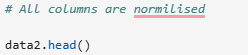

In [767]:
data2.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
0,2.062598,2.066595,2.062405,2.065214,0.042256,2.064562,2.067475,2.064075,2.065686,0.041661,0.282036,0.000625,0.671739,0.853010,0.720903,0.921237,1,1,2.066595,2.064075
1,2.065185,2.065194,2.063851,2.064455,0.022894,2.065616,2.065839,2.064476,2.064902,0.024294,0.283541,0.001472,0.928094,0.892308,0.895652,0.925418,0,0,2.065194,2.064476
2,2.064424,2.066365,2.064395,2.065734,0.013878,2.064902,2.066825,2.064752,2.066105,0.014785,0.283170,0.000954,0.920234,0.923244,0.940468,0.938127,0,0,2.066365,2.064752
3,2.065715,2.066075,2.065055,2.065585,0.015429,2.066105,2.066525,2.065415,2.065986,0.011261,0.279340,0.004383,0.934950,0.924916,0.939967,0.933110,0,0,2.066075,2.065415
4,2.065585,2.065815,2.065295,2.065555,0.011155,2.065992,2.066242,2.065645,2.065855,0.011640,0.282851,0.000510,0.932107,0.928763,0.941639,0.950000,0,0,2.065815,2.065645


_______________________

In [771]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35232 non-null  float64
 1   High_Bid          35232 non-null  float64
 2   Low_Bid           35232 non-null  float64
 3   Close_Bid         35232 non-null  float64
 4   Volume_Bid        35232 non-null  float64
 5   Open_Ask          35232 non-null  float64
 6   High_Ask          35232 non-null  float64
 7   Low_Ask           35232 non-null  float64
 8   Close_Ask         35232 non-null  float64
 9   Volume_Ask        35232 non-null  float64
 10  Volume_Delta      35232 non-null  float64
 11  Volume_Delta_abs  35232 non-null  float64
 12  Open_Delta        35232 non-null  float64
 13  High_Delta        35232 non-null  float64
 14  Low_Delta         35232 non-null  float64
 15  Close_Delta       35232 non-null  float64
 16  New_day           35232 non-null  int64 

#### Now just press 'CTRL' and 'ENTER' keys on the next 4 cells with code.

In [775]:
# Reducing memory size

columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask', 
                'Volume_Delta', 'Volume_Delta_abs', 
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_day', 'New_week']



In [777]:
for column in columns_float:
    data2[column] = pd.to_numeric(data2[column], downcast='float')

for column in columns_integer:
    data2[column] = pd.to_numeric(data2[column], downcast='integer')
    
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35232 non-null  float32
 1   High_Bid          35232 non-null  float32
 2   Low_Bid           35232 non-null  float32
 3   Close_Bid         35232 non-null  float32
 4   Volume_Bid        35232 non-null  float32
 5   Open_Ask          35232 non-null  float32
 6   High_Ask          35232 non-null  float32
 7   Low_Ask           35232 non-null  float32
 8   Close_Ask         35232 non-null  float32
 9   Volume_Ask        35232 non-null  float32
 10  Volume_Delta      35232 non-null  float32
 11  Volume_Delta_abs  35232 non-null  float32
 12  Open_Delta        35232 non-null  float32
 13  High_Delta        35232 non-null  float32
 14  Low_Delta         35232 non-null  float32
 15  Close_Delta       35232 non-null  float32
 16  New_day           35232 non-null  int8  

In [779]:
data2.shape

(35232, 20)

<Figure size 1200x500 with 0 Axes>

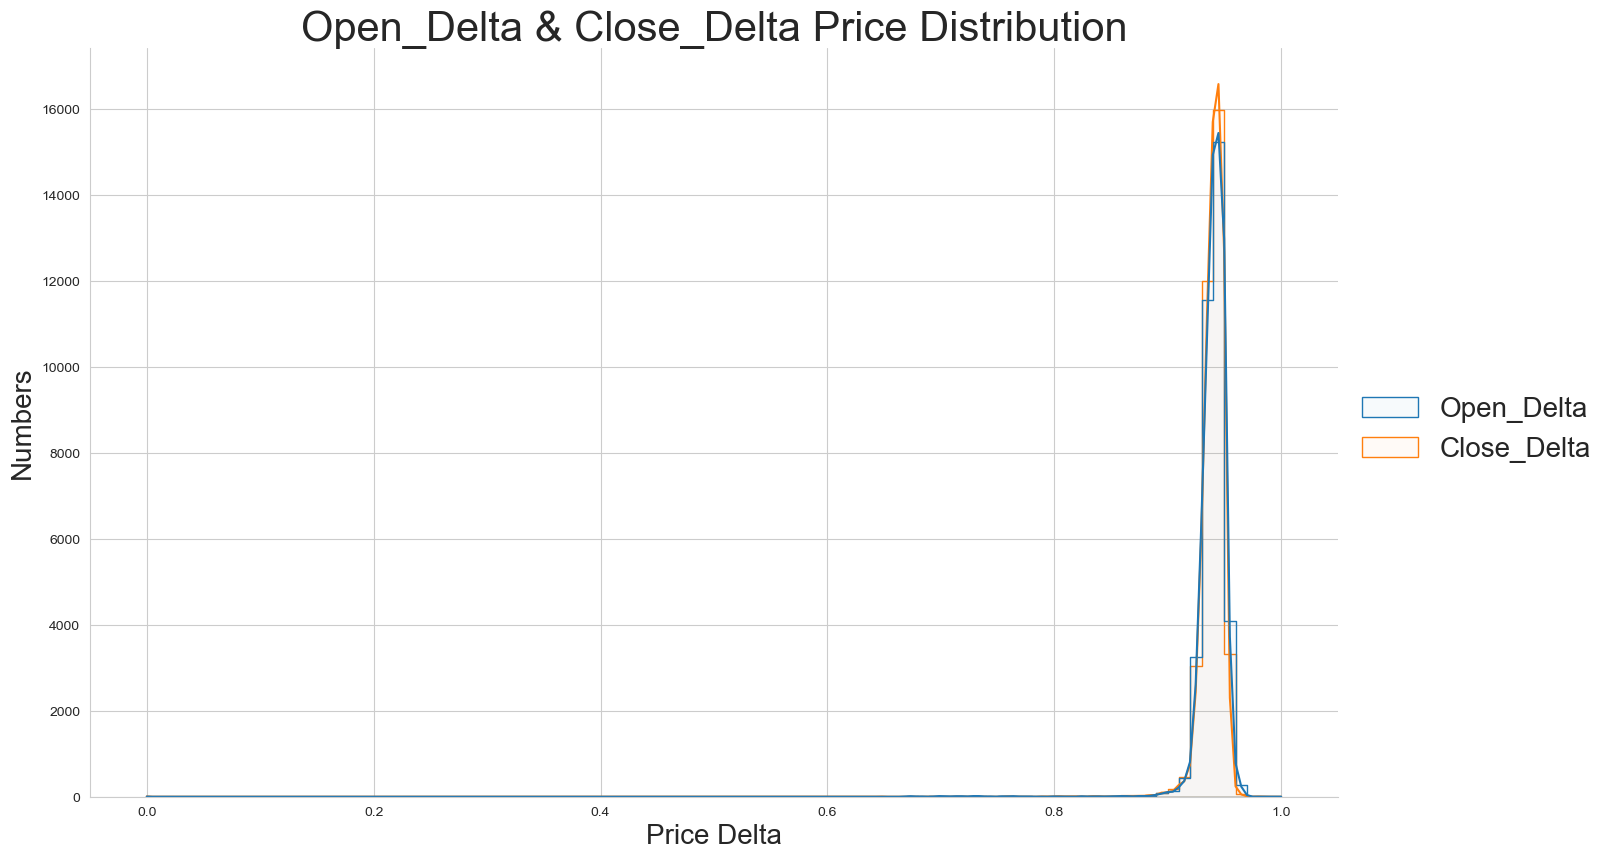

In [781]:
# inverse normalisation of price deltas, the minimum difference is more interesting

fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data2[['Open_Delta', 'Close_Delta']],
            height=8,
            aspect=1.7,
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('Open_Delta & Close_Delta Price Distribution')
plt.xlabel('Price Delta', size= 20)
plt.ylabel('Numbers', size= 20)
plt.show();

### Date transformation


In [785]:
# We will predict Wait-Attention modes
# Since we have a 5-minute dataset, Then we will shift MiN & MAX prices by 48 rows, which is 4 hours forward

#### Now just press 'CTRL' and 'ENTER' keys on the next 3 cells.

In [788]:
# Rows number

n=data2.shape[0]
n

35232

In [790]:
# Colonms number

p=data2.shape[1]
p

20

In [792]:
# Forward-looking window
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=48)


# create new columns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 4 hours
# 48 rows of 5-minute time-frame each

data2['Y_High_Bid_4h'] = data2['Y_High_Bid'].rolling(window=indexer).max()
data2['Y_Low_Ask_4h']  = data2['Y_Low_Ask'].rolling(window=indexer).min()

____________________

In [796]:
data2[['Y_High_Bid_4h', 'Y_Low_Ask_4h']].tail(50)

,Y_High_Bid_4h,Y_Low_Ask_4h
35182,2.326775,2.323125
35183,2.326775,2.323125
35184,2.326775,2.323125
35185,NaN,NaN
35186,NaN,NaN
35187,NaN,NaN
35188,NaN,NaN
35189,NaN,NaN
35190,NaN,NaN
35191,NaN,NaN


___________________________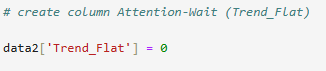

In [801]:
data2['Trend_Flat'] = 0

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [805]:
# Fill in "1s" If the movement (in any direction) within 4 hours is more than $10 (0.01 after the normalisation) 

data2.loc[ (data2["Y_High_Bid_4h"] - data2["Close_Ask"]) >= 0.01, 'Trend_Flat'] = 1
print( data2['Trend_Flat'].sum() )

data2.loc[ (data2["Close_Bid"] - data2["Y_Low_Ask_4h"]) >= 0.01, 'Trend_Flat'] = 1
print( data2['Trend_Flat'].sum() )

5767
10758


In [807]:
print(((data2["Y_High_Bid_4h"] - data2["Close_Ask"])>= 0.01).sum())
print(((data2["Close_Bid"] - data2["Y_Low_Ask_4h"])>= 0.01).sum())

5767
5450


In [809]:
# (5767+5450) = 11217
# 11217-10758 = 459       # rows after which the price moved in both directions by $10 or more

_________________________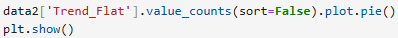

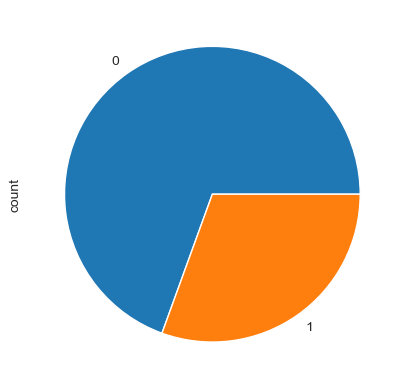

In [812]:
data2['Trend_Flat'].value_counts(sort=False).plot.pie()
plt.show()

In [815]:
# The dataset is unbalanced

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [818]:
# remove unused columns

data2 = data2.drop(['Y_High_Bid', 'Y_Low_Ask','Y_High_Bid_4h', 'Y_Low_Ask_4h'],axis=1)

In [820]:
# delete the last 48 rows (because we don't have prices for the last 4 hours)

#for i in range(5):
for i in range(48):
        data2.drop(data2.shape[0]-1, axis=0, inplace=True)

_________________________

In [823]:
data2.shape

(35184, 19)

_________________________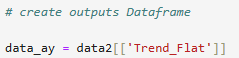

In [828]:
data_ay = data2[['Trend_Flat']]

____________________________

In [832]:
data_ay.shape

(35184, 1)

_________________________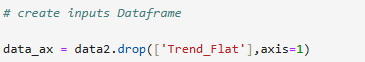

In [836]:
data_ax = data2.drop(['Trend_Flat'],axis=1)

__________________

In [840]:
data_ax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35184 entries, 0 to 35183
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35184 non-null  float32
 1   High_Bid          35184 non-null  float32
 2   Low_Bid           35184 non-null  float32
 3   Close_Bid         35184 non-null  float32
 4   Volume_Bid        35184 non-null  float32
 5   Open_Ask          35184 non-null  float32
 6   High_Ask          35184 non-null  float32
 7   Low_Ask           35184 non-null  float32
 8   Close_Ask         35184 non-null  float32
 9   Volume_Ask        35184 non-null  float32
 10  Volume_Delta      35184 non-null  float32
 11  Volume_Delta_abs  35184 non-null  float32
 12  Open_Delta        35184 non-null  float32
 13  High_Delta        35184 non-null  float32
 14  Low_Delta         35184 non-null  float32
 15  Close_Delta       35184 non-null  float32
 16  New_day           35184 non-null  int8  

__________________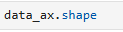

In [844]:
data_ax.shape

(35184, 18)

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [849]:
# Create inputs Numpy

data_a = np.array(data_ax) 

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 


data_a:
[[2.0626e+00 2.0666e+00 2.0624e+00 2.0652e+00 4.2256e-02 2.0646e+00
  2.0675e+00 2.0641e+00 2.0657e+00 4.1661e-02 2.8204e-01 6.2509e-04
  6.7174e-01 8.5301e-01 7.2090e-01 9.2124e-01 1.0000e+00 1.0000e+00]
 [2.0652e+00 2.0652e+00 2.0639e+00 2.0645e+00 2.2894e-02 2.0656e+00
  2.0658e+00 2.0645e+00 2.0649e+00 2.4294e-02 2.8354e-01 1.4721e-03
  9.2809e-01 8.9231e-01 8.9565e-01 9.2542e-01 0.0000e+00 0.0000e+00]]


[[2.3258 2.326  2.3256 2.3259 0.0276 2.3261 2.3263 2.3259 2.3262 0.0538
  0.3023 0.0276 0.9393 0.9455 0.9472 0.9393 0.     0.    ]
 [2.3259 2.326  2.3252 2.3257 0.0503 2.3262 2.3264 2.3256 2.326  0.0558
  0.2866 0.0058 0.9455 0.9393 0.94   0.9393 0.     0.    ]]
numpy size: =  (35184, 18)
type:  float32


In [851]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[0]
 [0]
 [0]]


[[0]
 [0]
 [0]]
numpy size: =  (35184, 1)
type:  int64


_______________________________________

In [855]:
len(data_a)

35184

#### Create the 3D inputs tensor, and 2D outputs matrix

In [860]:
# Analysis of the entire dataset would take a long time,
# so, please reduce the dataset by about 3 times to 12000 rows

# n_small = 12000 rows (5-minutes), which is around 2 months.

In [862]:
# We need a three-dimensional data tensor: [(n_small-N ), N, 18] and
# one-dimensional array of answers [(n_small-N ), 1] with the High and Low prices DURING the next 5 minutes

# where N=50 is the number of minutes for analysis at each step; those are looking backwards 

# Therefore, we need:
# three-dimensional data tensor of sliced graphs [(n_small - N - 5), N, 18] and
# two-dimensional matrix of answers Y[(n_small - N - 5), 2] 
# with the Trend-Flat indicator, indicating whether take profit will be reached within 4 hours or not

___________________________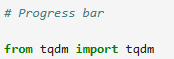

In [865]:
from tqdm import tqdm

#### Now just press 'CTRL' and 'ENTER' keys on the next 4 cells.

In [869]:
# n_small = len(data_y)    

n_small = 12000    # reduce the dataset size

N=50               # sliding window depth

L=n_small-N        # number of sliding window slices
t=data_a.shape[1]  # features number
print('Size of a three-dimensional inputs tensor: ',L,N,t)


Size of a three-dimensional inputs tensor:  11950 50 18


In [871]:
# create imputs zeros 3D tensors with 'float32'

data_b = np.zeros( (L, N, t), dtype= 'float32' ) 

In [873]:
# create a one-dimensional zeros vector of answers

Y = np.zeros((L, 1), dtype= 'float32')  # We will predict Attention - Wait for signals

In [875]:
# fill the imputs 3D tansor (data_b) 
# and the array of answers Y 


print('L = n_small - N = ', n_small-N, L)
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # Trend-Flat signal

print(k)                       # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N =  11950 11950


100%|█████████████████████████████████| 11950/11950 [00:00<00:00, 332711.12it/s]

11949
data_b: 
 [[[2.062598   2.066595   2.062405   ... 0.92123747 1.         1.        ]
  [2.065185   2.065194   2.063851   ... 0.9254181  0.         0.        ]
  [2.064424   2.066365   2.064395   ... 0.9381271  0.         0.        ]
  ...
  [2.067375   2.067745   2.067238   ... 0.9438127  0.         0.        ]
  [2.067695   2.067725   2.066445   ... 0.95167226 0.         0.        ]
  [2.066995   2.068605   2.066958   ... 0.95167226 0.         0.        ]]

 [[2.065185   2.065194   2.063851   ... 0.9254181  0.         0.        ]
  [2.064424   2.066365   2.064395   ... 0.9381271  0.         0.        ]
  [2.065715   2.066075   2.065055   ... 0.93311036 0.         0.        ]
  ...
  [2.067695   2.067725   2.066445   ... 0.95167226 0.         0.        ]
  [2.066995   2.068605   2.066958   ... 0.95167226 0.         0.        ]
  [2.068455   2.069415   2.068408   ... 0.95167226 0.         0.        ]]

 [[2.064424   2.066365   2.064395   ... 0.9381271  0.         0.        ]
  [2.0

_______________________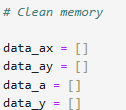

In [879]:
data_ax = []
data_ay = []
data_a = []
data_y = []

## Train Test Split
- 90% for training and validation
- 10% for testing

___________________________

In [885]:
from sklearn.model_selection import train_test_split

<html> <h3 style="font-style:bold; color:red;"> !!! Use parameters: shuffle = False, stratify = None

Otherwise, the whole time series will be mixed up!
</h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [890]:
# Separate "data_b" and "Y" into X_train, X_test, y_train, y_test i.e. getting training and testing set for the model.

X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1, 
                                                    shuffle = False, stratify = None,
                            # random_state - int for reproducible output across multiple function calls
                                                    random_state=101)

___________________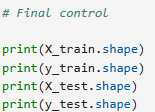

In [893]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10755, 50, 18)
(10755, 1)
(1195, 50, 18)
(1195, 1)


### Training

#### LSTM

_______________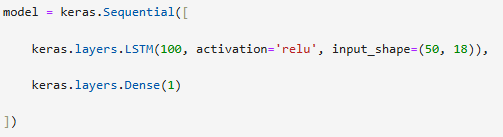

In [900]:
model = keras.Sequential([

    keras.layers.LSTM(100, activation='relu', input_shape=(50, 18)),

    keras.layers.Dense(1)

])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



___________________________

In [905]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        47,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,701 (186.33 KB)

 Trainable params: 47,701 (186.33 KB)

 Non-trainable params: 0 (0.00 B)

None


In [907]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        47,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,701 (186.33 KB)

 Trainable params: 47,701 (186.33 KB)

 Non-trainable params: 0 (0.00 B)

None


#### Callbacks

____________________________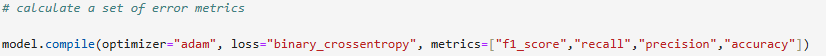

In [912]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["f1_score","recall","precision","accuracy"])

_________________________

In [916]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

________________________

In [920]:
mc = ModelCheckpoint('best_Trand-Flat_model_LSTM_GOLD.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

<html> <h4 style="font-style:bold; color:blue;"> If you are using your own laptop without a GPU (Graphics processing unit), 

please change the following parameter in the next cell 
</h4> </html>

<html> <h4 style="font-style:bold; color:red;">
epochs=10
</h4> </html>


__________________________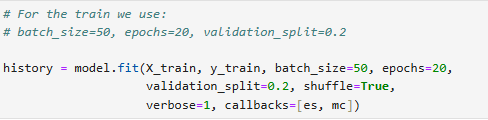

In [925]:
history = model.fit(X_train, y_train, batch_size=50, epochs=20, validation_split=0.2, shuffle=True, verbose=1, callbacks=[es, mc])

Epoch 1/20
171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8269 - f1_score: 0.2950 - loss: 2.7894 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1: val_loss improved from inf to 1.08653, saving model to best_Trand-Flat_model_LSTM_GOLD.keras
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8270 - f1_score: 0.2950 - loss: 2.7889 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9326 - val_f1_score: 0.1263 - val_loss: 1.0865 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8284 - f1_score: 0.2929 - loss: 2.7656 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss did not improve from 1.08653
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8284 - f1_score: 0.2929 - loss: 2.7655 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9326 - val_f1_score: 0.1263 - val_loss: 1.0865 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
172/173 ━━━━━━━━━━━━━━

______________________________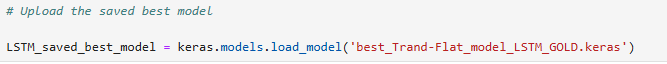

In [451]:
LSTM_saved_best_model = keras.models.load_model('best_Trand-Flat_model_LSTM_GOLD.keras')

#### Test

_________________________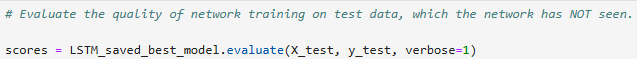

In [455]:
scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9667 - f1_score: 0.0620 - loss: 0.5364 - precision: 0.0000e+00 - recall: 0.0000e+00     


110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7252 - f1_score: 0.4785 - loss: 0.5792 - precision: 0.6892 - recall: 0.2052


____________________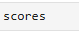

In [457]:
scores

[1.847848653793335, 0.2057056874036789, 0.0, 0.0, 0.8853556513786316]

[0.5490404963493347,
 0.42703667283058167,
 0.14989517629146576,
 0.5720000267028809,
 0.7387592196464539]

_______________________

In [461]:
print("loss function: %.9f " % (scores[0]))

loss function: 1.847848654 


loss function: 0.549040496 


### Visualisation

#### Loss function graphs during training

_________________________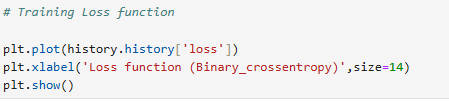

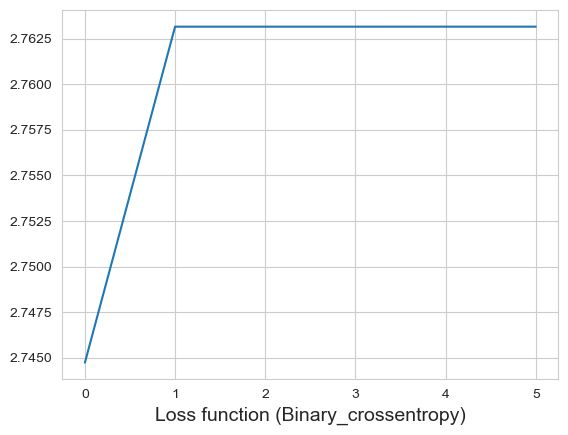

In [463]:
plt.plot(history.history['loss'])
plt.xlabel('Loss function (Binary_crossentropy)',size=14)
plt.show()

Text(0.5, 0, 'Loss function (Binary_crossentropy)')

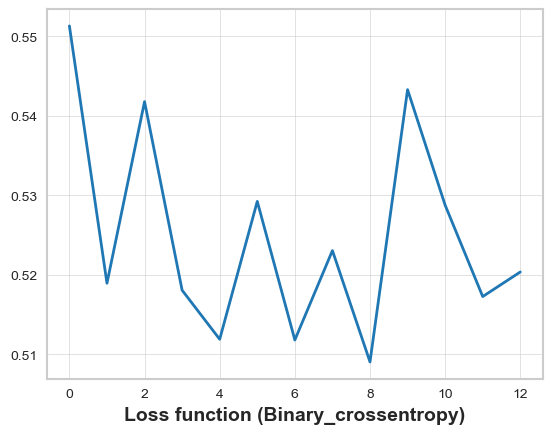

____________________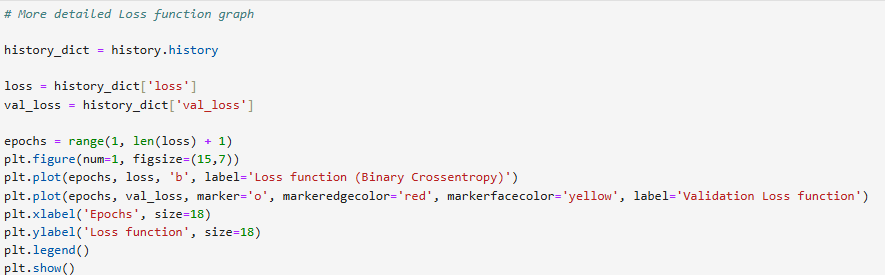

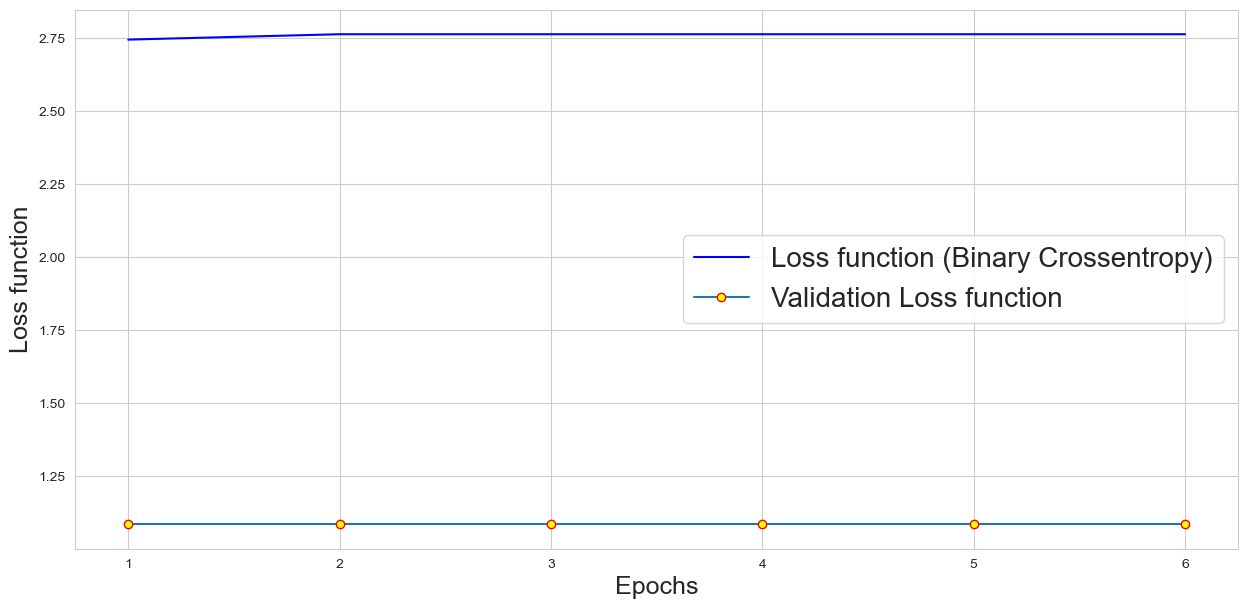

In [479]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, loss, 'b', label='Loss function (Binary Crossentropy)')
plt.plot(epochs, val_loss, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Loss function')
plt.xlabel('Epochs', size=18)
plt.ylabel('Loss function' , size=18)
plt.legend()
plt.show()

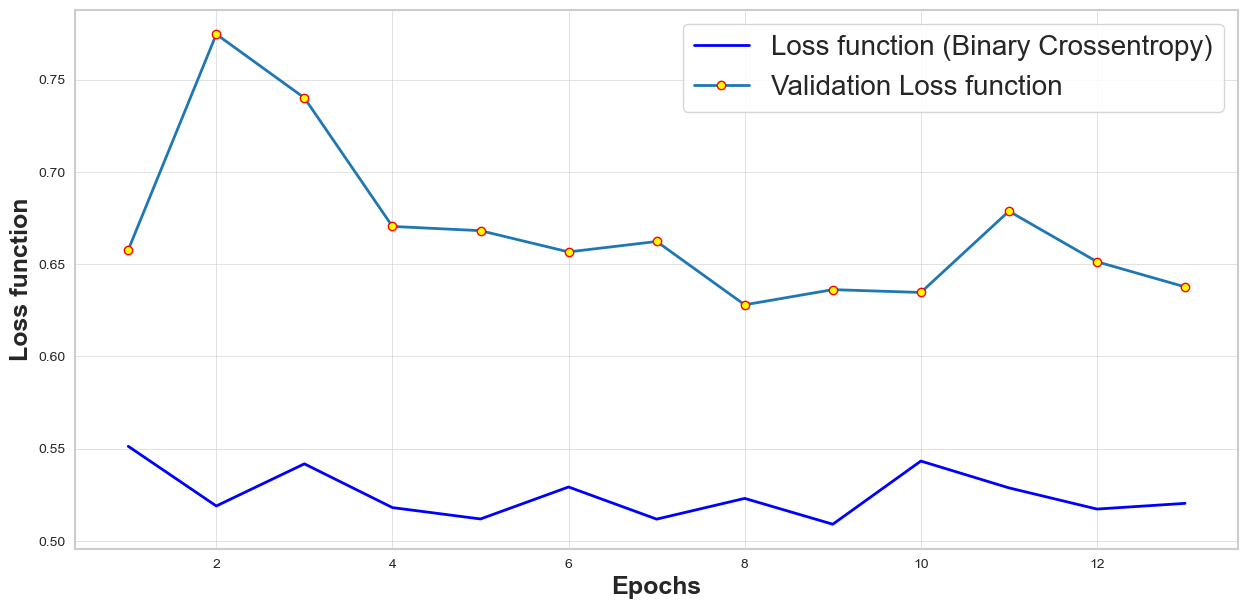

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
    
 - Plot 4 graphs:
   1) Precision during training graph
   2) More detailed Precision graph
   3) Training accuracy graph
   4) More detailed Accuracy graph

</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>

#### Precision during training

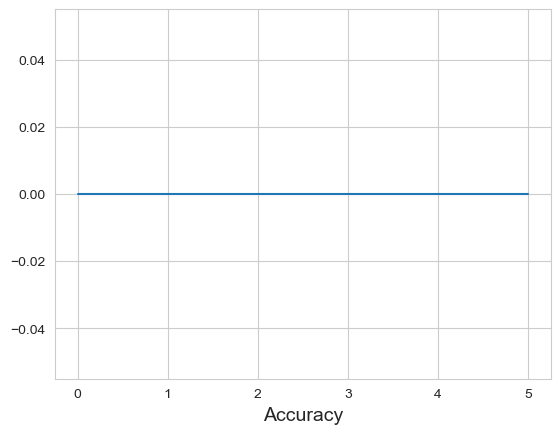

In [489]:
plt.plot(history.history['precision'])
plt.xlabel('Accuracy', size=14)
plt.show()

Text(0.5, 0, 'precision')

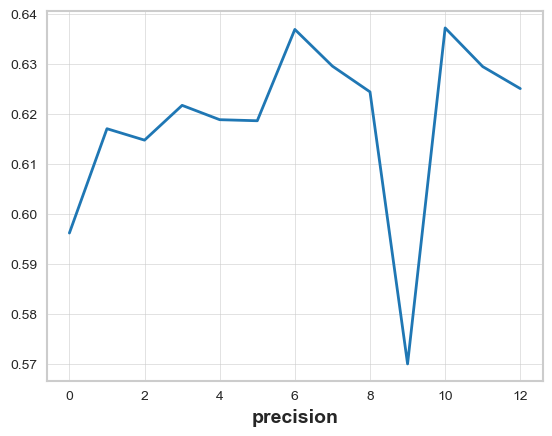

In [373]:
# 
# 
#    Your code of Precision_score
#
#



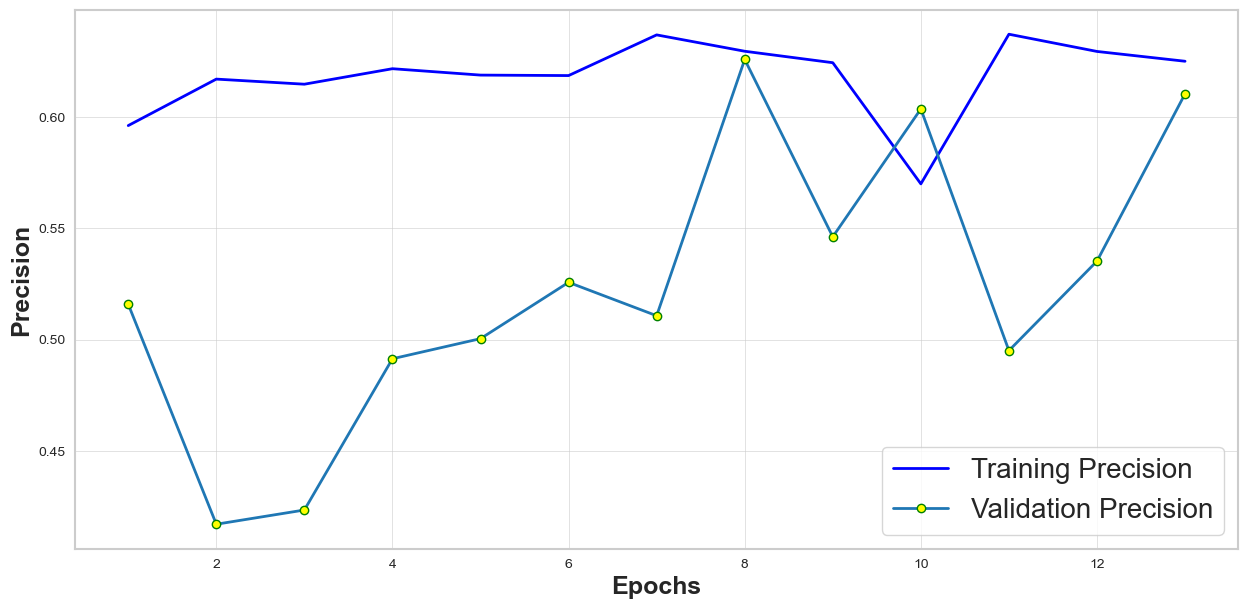

In [376]:
# 
# 
#    Your code of More detailed Precision
#
#



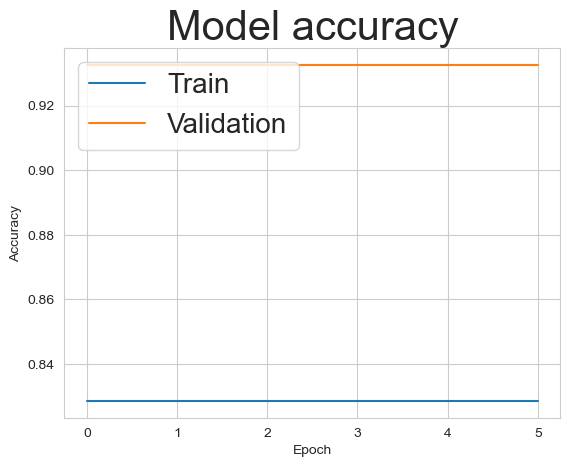

In [491]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

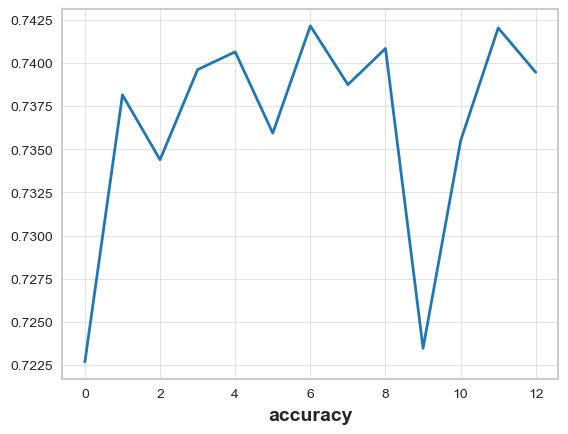

In [378]:
# 
# 
#    Your code of Training accuracy
#
#




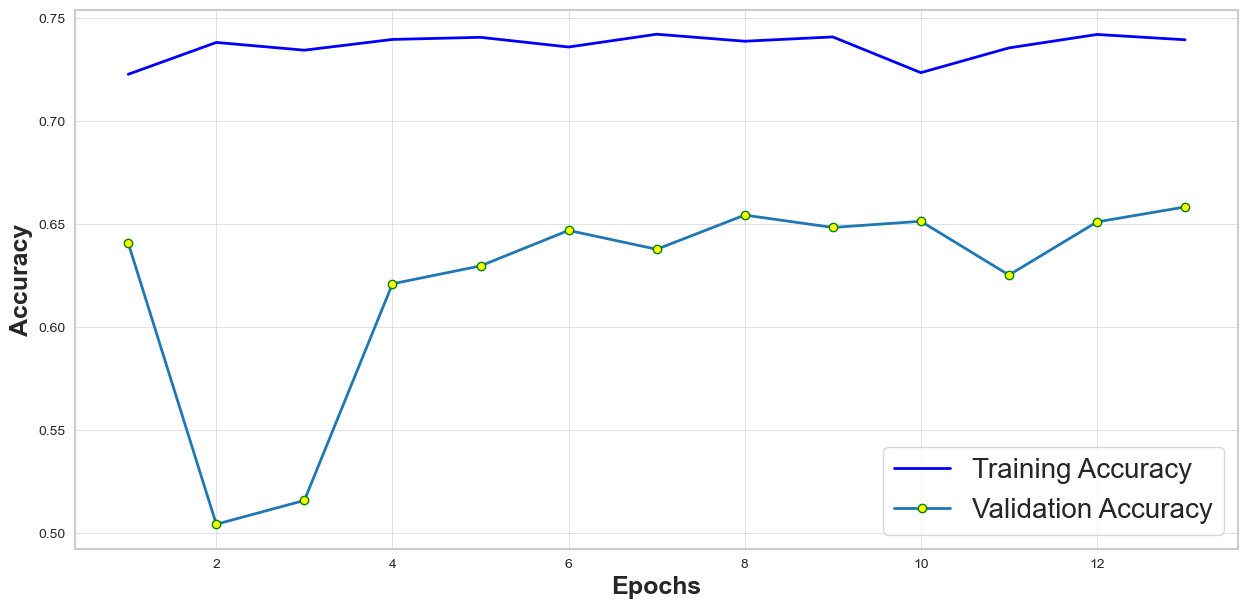

In [380]:
# 
# 
#    Your code of More detailed Accuracy
#
#



In [386]:
# Calculate the prediction vector

pred = LSTM_saved_best_model(X_test)


In [387]:
print(pred)

tf.Tensor(
[[0.17049973]
 [0.21355858]
 [0.21770343]
 ...
 [0.27913097]
 [0.286549  ]
 [0.2806727 ]], shape=(3514, 1), dtype=float32)


In [390]:
len(pred)

3514

In [393]:
import random

pred = model.predict(X_test)

# Check: we take a random element random.randint() and look: what is the difference between test and predict

n_rec = random.randint(0, X_test.shape[0])
print(n_rec)


print("Predicted probability:", pred[n_rec], ", right answer:", y_test[n_rec])


110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step
500
Predicted probability: [0.38596952] , right answer: [0.] , error: [0.38596952]


Right answer:  [0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


C:\Users\vital\AppData\Local\Temp\ipykernel_8608\2279548233.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



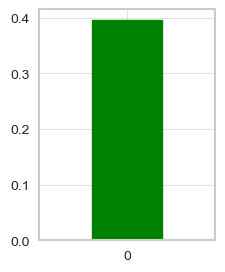

Predicted answer: 0 is Flat 
 
Right answer: 0 is Flat
['0 is Flat', '1 is Trend']


In [408]:
classes=['0 is Flat', '1 is Trend']

index = random.randint(0, y_test.shape[0])
print('Right answer: ', y_test[index])

x = X_test[index]
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)
sample = x

ans = round(float(prediction))

fig = plt.figure(figsize=(5,3))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(1), prediction[0], align='center')
if ans == y_test[index]:
    bar_list[0].set_color('g')
else:
    bar_list[0].set_color('r')
    
ax.set_xticks(np.arange(1))
ax.set_xlim([-1, 1])
ax.grid('on')

plt.show()
print('Predicted answer: {}'.format(classes[ans]), "\n ")
print('Right answer: {}'.format(classes[y_test[index][0].astype(int)]) )
print(classes)